# Navigation Task with Multiple Targets

In [1]:
import torch
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from model.kohonen_som import KohonenSOM
from model.manager_som_position import ManagerSOMPosition, ManagerSOMPositionAllNeighbor
from custom_env.navigation_task import NavigationTaskMultiTarget
%matplotlib inline

path exception


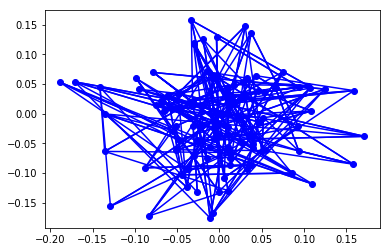

/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


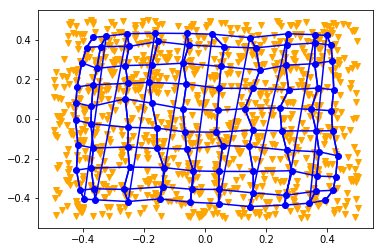

tensor([[ 0.3934, -0.4105],
        [ 0.4182, -0.3603],
        [ 0.4269, -0.2921],
        [ 0.4332, -0.1859],
        [ 0.4168, -0.0593],
        [ 0.4129,  0.0422],
        [ 0.4206,  0.1477],
        [ 0.4162,  0.2936],
        [ 0.4117,  0.3730],
        [ 0.3972,  0.4223],
        [ 0.3412, -0.4254],
        [ 0.3611, -0.3646],
        [ 0.3648, -0.2883],
        [ 0.3731, -0.1659],
        [ 0.3629, -0.0599],
        [ 0.3466,  0.0484],
        [ 0.3683,  0.1565],
        [ 0.3580,  0.2797],
        [ 0.3589,  0.3836],
        [ 0.3586,  0.4263],
        [ 0.2603, -0.4352],
        [ 0.2632, -0.3863],
        [ 0.2845, -0.2614],
        [ 0.2663, -0.1578],
        [ 0.2505, -0.0600],
        [ 0.2441,  0.0564],
        [ 0.2733,  0.1477],
        [ 0.2631,  0.2717],
        [ 0.2669,  0.3753],
        [ 0.2703,  0.4308],
        [ 0.1451, -0.4428],
        [ 0.1572, -0.3735],
        [ 0.1572, -0.2652],
        [ 0.1431, -0.1384],
        [ 0.1567, -0.0563],
        [ 0.1296,  0

In [2]:
x = torch.rand(1000, 2)-0.5
maxitr = 10**4*5
som = KohonenSOM(total_nodes=100, node_size=2, update_iterations=maxitr)
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
for t in range(maxitr):
    a, c = som.update(x, t, 0)
    
plt.plot(x[:, 0].numpy(), x[:, 1].numpy(), marker='v', linestyle='None', color='orange')
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
som.w

## Manager Self Organizing Map

/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


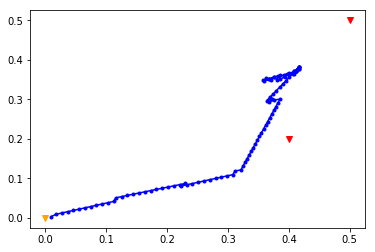

[True, False]
99 29.391914624545674


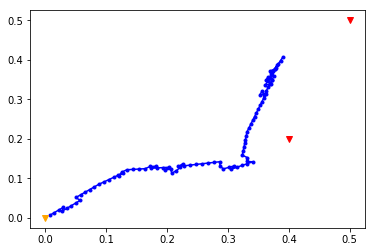

[True, False]
199 25.911592971507872


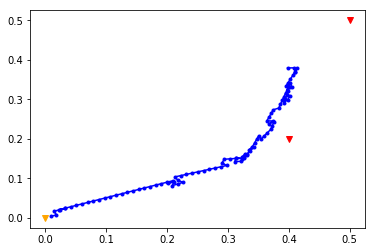

[True, False]
299 27.15205425063258


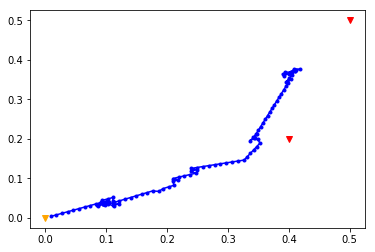

[True, False]
399 26.67888369448822


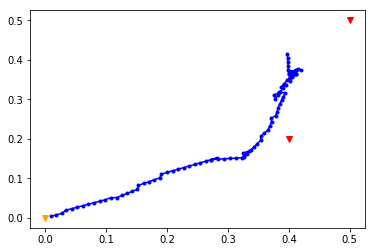

[True, False]
499 29.943124262985066


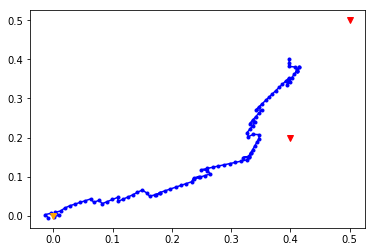

[True, False]
599 22.70716267585537


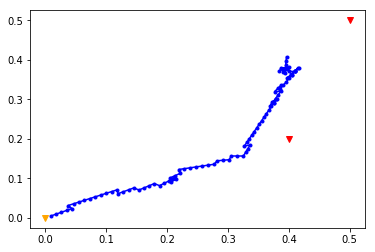

[True, False]
699 28.97910169042724


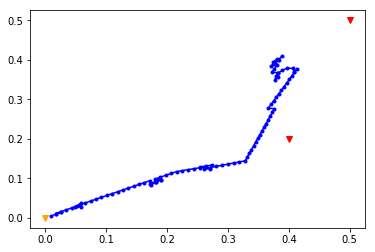

[True, False]
799 26.42825142939085


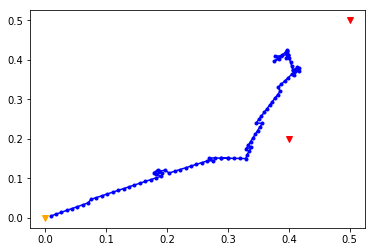

[True, False]
899 30.04040121051286


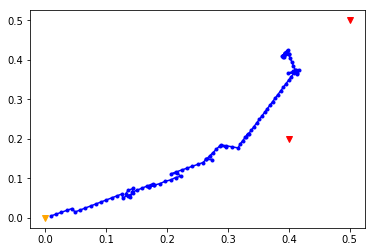

[True, False]
999 28.28726033663917


In [3]:
manager_maxitr = 10 ** 3
maxtime = 100
epsilon = 0.2
torch.manual_seed(0)
random.seed(0)

manager_som = ManagerSOMPosition(total_nodes=100, state_som = som, worker_som=som, update_iterations=manager_maxitr)
task = NavigationTaskMultiTarget()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

        else:
            action_index = random.randrange(som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(som.w[action_index])
        
        # online training
        manager_som.action_q_learning(
            current_state_position = som.location[som.select_winner(obs)],
            next_state_position = som.location[som.select_winner(next_obs)],
            action_index = action_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    if epoch % 100 == 99:
        plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
        plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
        
        for i in range(task.all_goals.shape[0]):
            plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
        plt.show()
        print(task.goal_completed)
        print(epoch, total_return)
    
    task.reset()

/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


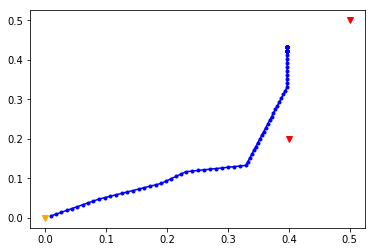

[True, False]
30.68331455071104


In [4]:
# for visualization
total_return = 0
state_trajectory = []

for t in range(maxtime): 
    obs = task.state()
    action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

    # step forward
    reward, next_obs = task.step(som.w[action_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')

for i in range(task.all_goals.shape[0]):
    plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
plt.show()
print(task.goal_completed)
print(total_return)

task.reset()

/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


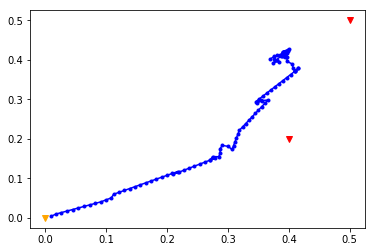

[True, False]
99 30.081208523741545


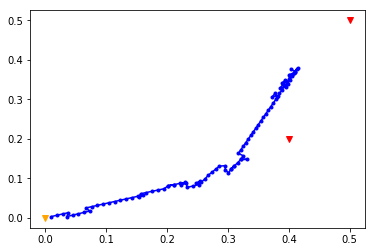

[True, False]
199 27.058728692276297


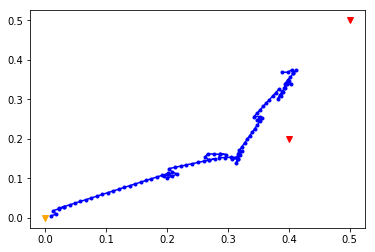

[True, False]
299 27.52544069807846


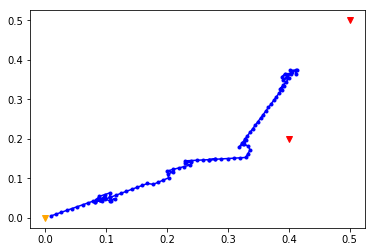

[True, False]
399 26.97142519107374


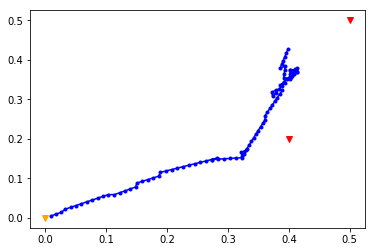

[True, False]
499 30.20314175503586


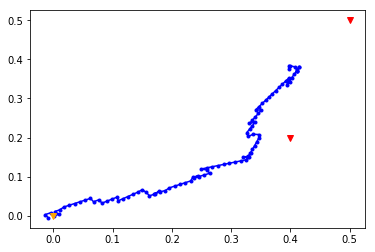

[True, False]
599 22.890945276559084


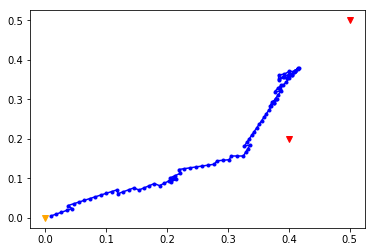

[True, False]
699 28.978970925740427


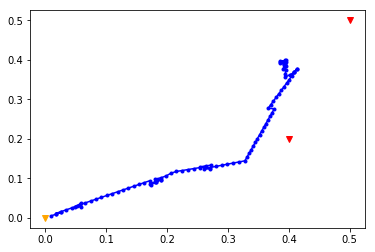

[True, False]
799 26.4221930814381


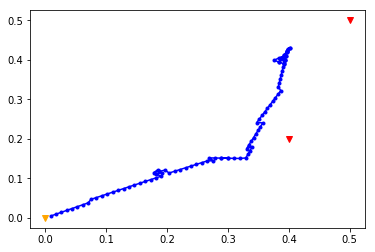

[True, False]
899 30.041609976799293


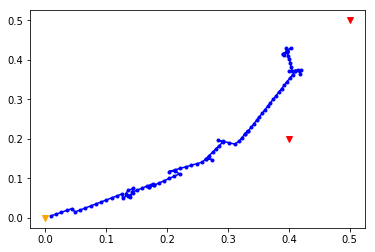

[True, False]
999 28.289920321949488


In [5]:
manager_maxitr = 10 ** 3
maxtime = 100
epsilon = 0.2
torch.manual_seed(0)
random.seed(0)

manager_som = ManagerSOMPositionAllNeighbor(total_nodes=100, state_som = som, worker_som=som, update_iterations=manager_maxitr)
task = NavigationTaskMultiTarget()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

        else:
            action_index = random.randrange(som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(som.w[action_index])
        
        # online training
        manager_som.action_q_learning(
            current_state_position = som.location[som.select_winner(obs)],
            next_state_position = som.location[som.select_winner(next_obs)],
            action_index = action_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    if epoch % 100 == 99:
        plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
        plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
        
        for i in range(task.all_goals.shape[0]):
            plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
        plt.show()
        print(task.goal_completed)
        print(epoch, total_return)
    
    task.reset()

/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


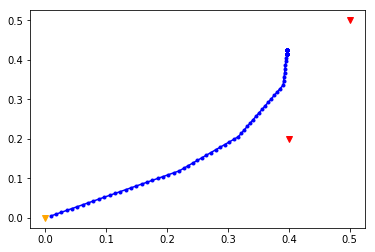

[True, False]
30.801645408581358


In [6]:
# for visualization
total_return = 0
state_trajectory = []

for t in range(maxtime): 
    obs = task.state()
    action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

    # step forward
    reward, next_obs = task.step(som.w[action_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')

for i in range(task.all_goals.shape[0]):
    plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
plt.show()
print(task.goal_completed)
print(total_return)

task.reset()